In [5]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from analysis import *

# Parameters
stimulus = 'drifting_grating'
session_ids = [721123822, 732592105, 737581020, 750749662, 732592105, 737581020, 742951821, 799864342]
#session_ids = [721123822, 750749662, 742951821, 799864342]
session_ids = [732592105]
freq = '2.0'
plt_range = (0, 100.)
sxx_plt_range = [8.0, 80.0]
aperiodic_mode = 'knee'
mean_channels = False
remove_aperiodic = {'freq_range': (8., 200.), 'aperiodic_mode': aperiodic_mode}
min_channel_amount = None


if stimulus == 'drifting_grating':
    all_frequencies = []
    for id in session_ids:
        data = xr.open_dataarray(f"data_saved_from_lfp_notebook/LFP{id}_{freq}Hz_{stimulus}.nc")
        all_frequencies.append(data.frequency.values)

    for id in session_ids:
        data = xr.open_dataset(f"data_saved_from_lfp_notebook/sxx{id}_{freq}Hz_{stimulus}.nc")
        # Update min_channel_amount to the smallest channel count across sessions
        if min_channel_amount is None:
            min_channel_amount = data.channel.values.max()
        if min_channel_amount > data.channel.values.max():
            min_channel_amount = data.channel.values.max()

    average_frequency = np.mean(all_frequencies, axis=0)

    session_data = []
    for id in session_ids:
        data = xr.open_dataarray(f"data_saved_from_lfp_notebook/LFP{id}_{freq}Hz_{stimulus}.nc")
        data = data.interp(frequency=average_frequency)
        session_data.append(data)
        
    combined_data = xr.concat(session_data, dim='session_id')
    average_data = combined_data.mean(dim='session_id')
else:
    all_frequencies = []
    for id in session_ids:
        data = xr.open_dataarray(f"data_saved_from_lfp_notebook/LFP{id}_movie.nc")
        all_frequencies.append(data.frequency.values)

    for id in session_ids:
        data = xr.open_dataarray(f"data_saved_from_lfp_notebook/LFP{id}_movie.nc")
        # Update min_channel_amount to the smallest channel count across sessions
        if min_channel_amount is None:
            min_channel_amount = data.channel.values.max()
        if min_channel_amount > data.channel.values.max():
            min_channel_amount = data.channel.values.max()

    average_frequency = np.mean(all_frequencies, axis=0)

    session_data = []
    for id in session_ids:
        data = xr.open_dataarray(f"data_saved_from_lfp_notebook/LFP{id}_movie.nc")
        data = data.interp(frequency=average_frequency)
        session_data.append(data)
    combined_data = xr.concat(session_data, dim='session_id')
    average_data = combined_data.mean(dim='session_id')


Channel:  0
                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 1 - 100 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                         Aperiodic Parameters (offset, knee, exponent):                           
                                   -4.4457, 93653.7235, 3.4650                                    
                                                                                                  
                                       3 peaks were found:                                       

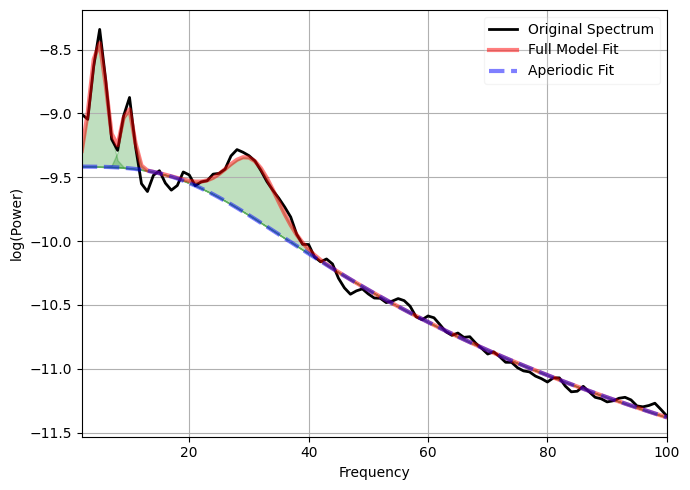

Channel:  1
                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 1 - 100 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                         Aperiodic Parameters (offset, knee, exponent):                           
                                    -5.2026, 3585.9892, 2.8771                                    
                                                                                                  
                                       4 peaks were found:                                       

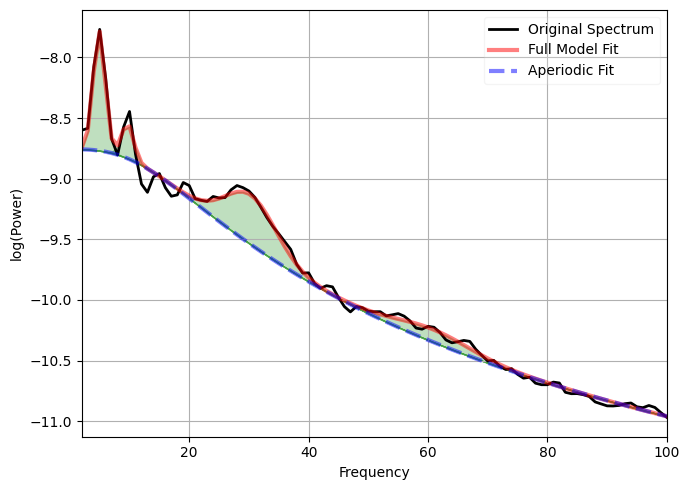

Channel:  2
                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 1 - 100 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                         Aperiodic Parameters (offset, knee, exponent):                           
                                    -5.8920, 558.2194, 2.4957                                     
                                                                                                  
                                       4 peaks were found:                                       

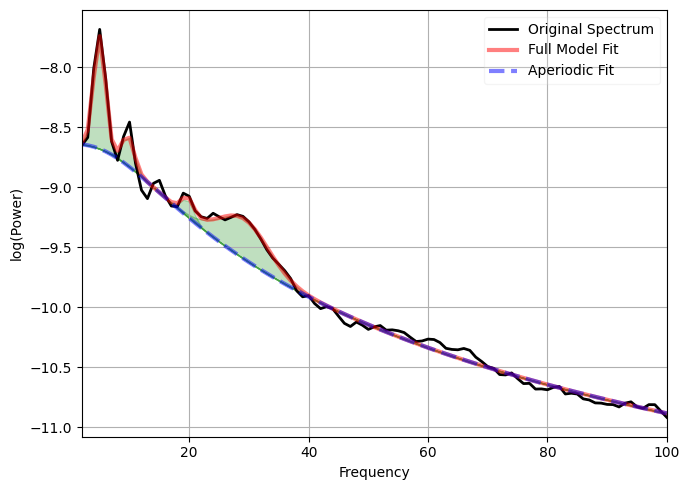

Channel:  3
                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 1 - 100 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                         Aperiodic Parameters (offset, knee, exponent):                           
                                    -6.3248, 200.1683, 2.4141                                     
                                                                                                  
                                       4 peaks were found:                                       

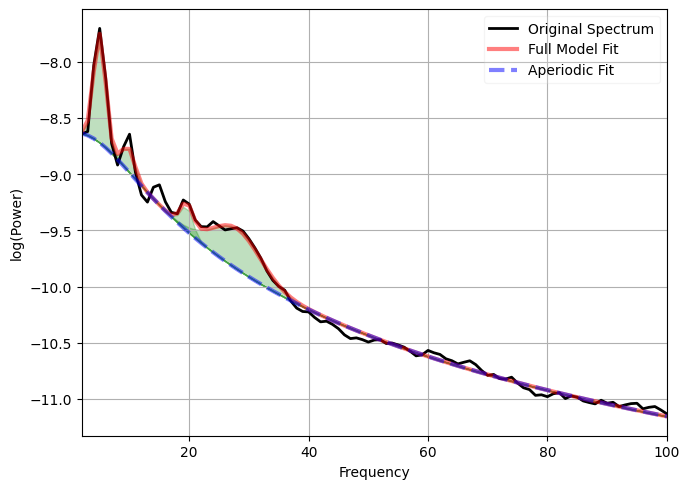

Channel:  4
                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 1 - 100 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                         Aperiodic Parameters (offset, knee, exponent):                           
                                    -6.4470, 198.0003, 2.4401                                     
                                                                                                  
                                       4 peaks were found:                                       

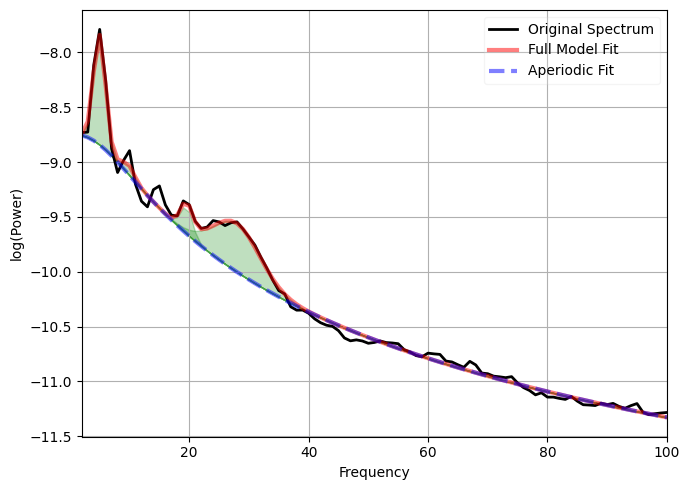

Channel:  5
                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 1 - 100 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                         Aperiodic Parameters (offset, knee, exponent):                           
                                    -6.7380, 186.2874, 2.3521                                     
                                                                                                  
                                       4 peaks were found:                                       

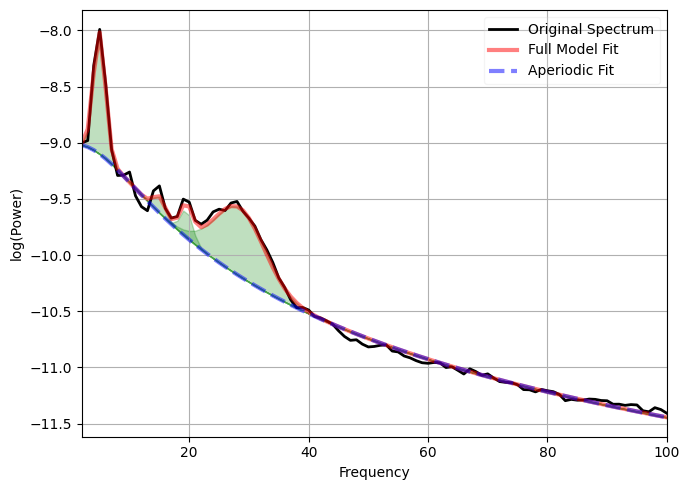

Channel:  6
                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 1 - 100 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                         Aperiodic Parameters (offset, knee, exponent):                           
                                    -6.7200, 266.7026, 2.3817                                     
                                                                                                  
                                       4 peaks were found:                                       

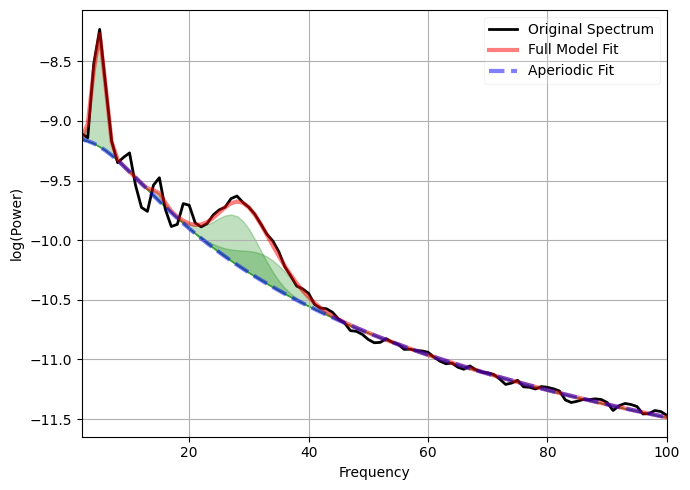

In [6]:
for channel in range(min_channel_amount):
    plot_channel_psd(average_data, channel_id=channel,
                            freq_range=100., plt_range=plt_range, figsize=(7, 5),
                            aperiodic_mode=aperiodic_mode, dB_threshold=1., max_n_peaks=4, plt_log=False,peak_width_limits=(2,30))

    plt.savefig(f"figures_for_drew/single_session_analysis_732592105/2Hz/{stimulus}_fooof_channel{channel}.pdf",dpi=300)
    plt.show()

Avg scaleogram

In [7]:
# Containers for session data, frequencies, and times
session_data = []
all_frequencies = []
all_times = []
if stimulus == 'drifting_grating':
    # Loop through session IDs to collect frequencies and times
    for id in session_ids:
        data = xr.open_dataset(f"data_saved_from_lfp_notebook/sxx{id}_{freq}Hz_{stimulus}.nc")
        all_frequencies.append(data.frequency.values)
        all_times.append(data.time.values)

    # Calculate the average frequency and time values
    average_frequency = np.mean(all_frequencies, axis=0)
    average_time = np.mean(all_times, axis=0)

    # Loop again to interpolate and collect data
    for id in session_ids:
        data = xr.open_dataset(f"data_saved_from_lfp_notebook/sxx{id}_{freq}Hz_{stimulus}.nc")
        # Update min_channel_amount to the smallest channel count across sessions
        if min_channel_amount is None:
            min_channel_amount = data.channel.values.max()
        if min_channel_amount > data.channel.values.max():
            min_channel_amount = data.channel.values.max()

        # Optionally average across channels
        if mean_channels:
            data = data.PSD.mean(dim='channel')
        
        # Interpolate to the average frequency and time axes
        data = data.interp(frequency=average_frequency, time=average_time)
        
        # Append processed data to the list
        session_data.append(data)

    # Stack and average session data
    combined_data = xr.concat(session_data, dim='session_id')
    average_data = combined_data.mean(dim='session_id')
else:
    all_frequencies = []
    for id in session_ids:
        data = xr.open_dataset(f"data_saved_from_lfp_notebook/sxx{id}_{stimulus}.nc")
        all_frequencies.append(data.frequency.values)
        all_times.append(data.time.values)

    average_time = np.mean(all_times, axis=0)
    average_frequency = np.mean(all_frequencies, axis=0)
    for id in session_ids:
        data = xr.open_dataset(f"data_saved_from_lfp_notebook/sxx{id}_{stimulus}.nc")
        # Update min_channel_amount to the smallest channel count across sessions
        if min_channel_amount is None:
            min_channel_amount = data.channel.values.max()
        if min_channel_amount > data.channel.values.max():
            min_channel_amount = data.channel.values.max()

        data = data.interp(frequency=average_frequency, time=average_time)
        session_data.append(data)

    combined_data = xr.concat(session_data, dim='session_id')
    average_data = combined_data.mean(dim='session_id')

    

# Display or plot the averaged data as needed
display(average_data)


<xarray.Dataset>
Dimensions:                      (time: 300, channel: 8, frequency: 28)
Coordinates:
  * channel                      (channel) int32 0 1 2 3 4 5 6 7
  * frequency                    (frequency) float64 4.419 4.961 ... 89.09 100.0
  * time                         (time) float64 -0.5 -0.495 -0.49 ... 0.99 0.995
Data variables:
    cone_of_influence_frequency  (time) float64 572.8 190.9 ... 190.9 572.8
    PSD                          (channel, frequency, time) float64 1.942e-08...

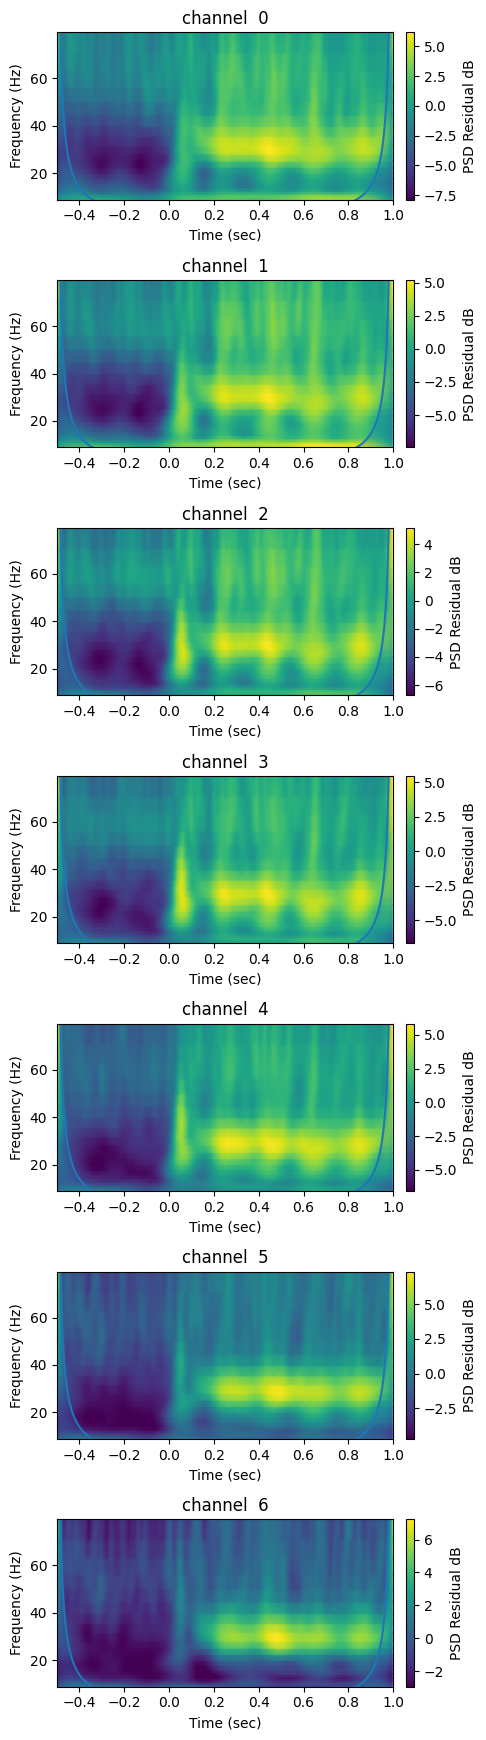

In [8]:
axs = plot_channel_spectrogram(average_data, channel_id=range(min_channel_amount),
                                       plt_range=sxx_plt_range, log_power='dB',
                                       clr_freq_range=(20., 45.), pad=0.03, figsize=(5, 2.5),
                                       remove_aperiodic={'freq_range': 200., 'aperiodic_mode': aperiodic_mode})

#plt.xlim(-0.5,1)
plt.savefig(f"figures_for_drew/single_session_analysis_732592105/2Hz/{stimulus}_Scalogram.pdf",dpi=300)